In [49]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [50]:
aftersale = pd.read_csv('C:/Users/sarah/Downloads/aftersale isues.csv')
aftersale.head()

,customer_id,product,status,frsh_created_at,failure_cause,issue,customer_name,aging_late,no_of_issues,bad 90,Risk
0,0ce3ce2b,RainMaker 2 + TV,Advance,19/10/2021 10:39:37,NaN,NaN,Elvas Kipkemei,Current,1,0,Not At Risk
1,15JG4Q79,RainMaker 2 + TV,Advance,19/10/2021 10:57:44,NaN,NaN,John Kiplagat,Current,1,0,Not At Risk
2,b5b670e4,RainMaker 2 + TV,Advance,26/04/2021 06:01:46,NaN,NaN,James Chege,Current,1,0,Not At Risk
3,TCZXUQDM,RainMaker 2 + TV,Advance,19/10/2021 16:20:13,NaN,NaN,David Khaemba Kubabi,Current,1,0,Not At Risk
4,e714e9be,RainMaker 2 + TV,Advance,22/11/2021 07:28:01,NaN,NaN,Joseph Kemboi,Current,1,0,Not At Risk


(0.0, 8.0)

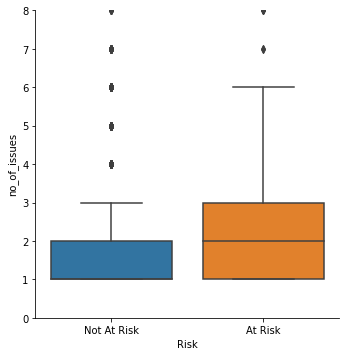

In [51]:
sns.catplot(x="Risk", y="no_of_issues", kind="box", data=aftersale)
plt.ylim(0, 8)

(0.0, 20.0)

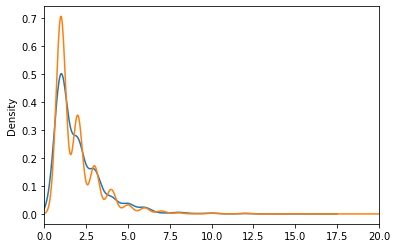

In [52]:
aftersale.groupby("Risk").no_of_issues.plot(kind='kde')
plt.xlim(0,20)

In [53]:
aftersale.groupby("Risk")["no_of_issues"].describe().reset_index()

,Risk,count,mean,std,min,25%,50%,75%,max
0,At Risk,727.0,2.055021,1.469525,1.0,1.0,2.0,3.0,12.0
1,Not At Risk,3128.0,1.972506,1.434826,1.0,1.0,1.0,2.0,15.0


In [54]:
aftersale_at_risk = aftersale[aftersale["Risk"] == "At Risk"]["no_of_issues"]
aftersale_not_at_risk = aftersale[aftersale["Risk"] == "Not At Risk"]["no_of_issues"]

In [55]:
stat, p = mannwhitneyu(aftersale_at_risk, aftersale_not_at_risk)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1099829.000, p=0.068
